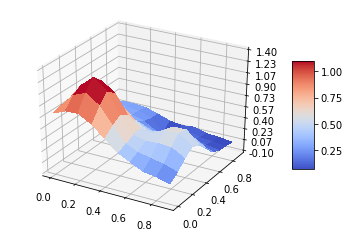

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx


fig         = plt.figure() 
ax          = fig.gca(projection='3d')

# Make data. 
x           = np.arange(0, 1, 0.1)
y           = np.arange(0, 1, 0.1)
design      = fx.DesignDesign(x,y,3)
x, y        = np.meshgrid(x,y)
noise_level = 0.01


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()





This is not a nice way of plotting the data, do you know any better display methods? Preferably less grainy.

In [18]:

beta_ols = fx.OridinaryLeastSquares(design,np.ravel(frank))
#beta_ridge = fx.RidgeRegression(design,np.ravel(frank),0.001)

print(design)
#print(np.shape(beta_ridge))



[[1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [1.    0.1   0.    0.01  0.    0.    0.001 0.    0.    0.   ]
 [1.    0.2   0.    0.04  0.    0.    0.008 0.    0.    0.   ]
 [1.    0.3   0.    0.09  0.    0.    0.027 0.    0.    0.   ]
 [1.    0.4   0.    0.16  0.    0.    0.064 0.    0.    0.   ]
 [1.    0.5   0.    0.25  0.    0.    0.125 0.    0.    0.   ]
 [1.    0.6   0.    0.36  0.    0.    0.216 0.    0.    0.   ]
 [1.    0.7   0.    0.49  0.    0.    0.343 0.    0.    0.   ]
 [1.    0.8   0.    0.64  0.    0.    0.512 0.    0.    0.   ]
 [1.    0.9   0.    0.81  0.    0.    0.729 0.    0.    0.   ]
 [1.    0.    0.1   0.    0.    0.01  0.    0.    0.    0.001]
 [1.    0.1   0.1   0.01  0.01  0.01  0.001 0.001 0.001 0.001]
 [1.    0.2   0.1   0.04  0.02  0.01  0.008 0.004 0.002 0.001]
 [1.    0.3   0.1   0.09  0.03  0.01  0.027 0.009 0.003 0.001]
 [1.    0.4   0.1   0.16  0.04  0.01  0.064 0.016 0.004 0.001]
 [1.    0.5   0.1   0.25  0.05  0.01  0.125 0.025 0.005

In [19]:
n_x=10   # number of points
m=3        # degree of polynomial

# sort the random values, else your fit will go crazy
x = np.sort(np.random.uniform(0, 1, n_x))
y = np.sort(np.random.uniform(0, 1, n_x))

# use the meshgrid functionality, very useful
x, y = np.meshgrid(x,y)

#Transform from matrices to vectors
x_1=np.ravel(x)
y_1=np.ravel(y)
n=int(len(x_1))


# finally create the design matrix
X= fx.CreateDesignMatrix_X(x_1,y_1,n=m)

In [20]:
print(X)

[[1.00000000e+00 7.55130612e-03 1.42828655e-01 5.70222241e-05
  1.07854290e-03 2.04000247e-02 4.30592270e-07 8.14440758e-06
  1.54046831e-04 2.91370809e-03]
 [1.00000000e+00 1.01556322e-01 1.42828655e-01 1.03136865e-02
  1.45051529e-02 2.04000247e-02 1.04742007e-03 1.47308997e-03
  2.07175147e-03 2.91370809e-03]
 [1.00000000e+00 3.26228267e-01 1.42828655e-01 1.06424882e-01
  4.65947446e-02 2.04000247e-02 3.47188048e-02 1.52005228e-02
  6.65506470e-03 2.91370809e-03]
 [1.00000000e+00 3.49040628e-01 1.42828655e-01 1.21829360e-01
  4.98530034e-02 2.04000247e-02 4.25233963e-02 1.74007236e-02
  7.12043743e-03 2.91370809e-03]
 [1.00000000e+00 4.06285848e-01 1.42828655e-01 1.65068190e-01
  5.80292613e-02 2.04000247e-02 6.70648698e-02 2.35764676e-02
  8.28824134e-03 2.91370809e-03]
 [1.00000000e+00 4.96456395e-01 1.42828655e-01 2.46468952e-01
  7.09081992e-02 2.04000247e-02 1.22361087e-01 3.52028289e-02
  1.01277227e-02 2.91370809e-03]
 [1.00000000e+00 5.32014980e-01 1.42828655e-01 2.83039939e